#### Non-Linear SVM - Email Spam Classifier
Problem Statement: We have to build a non-linear SVM classifier to classify emails and compare the performance with the linear SVM model.
The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

**Loading Data**

In [2]:
email_rec = pd.read_csv("./dataset/Spam.txt",  sep = ',', header= None )

**Renaming the column names**

In [3]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

#### Data Preparation

In [4]:
# splitting into X and y
X = email_rec.drop("spam", axis = 1)
y = email_rec.spam.values.astype(int)

In [5]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

#### Model Building

In [6]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Model Evaluation Metrics

In [7]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[811,  38],
       [ 61, 471]], dtype=int64)

In [8]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9283128167994207
precision 0.925343811394892
recall 0.8853383458646616


#### Hyperparameter Tuning 

#### Grid Search to Find Optimal Hyperparameters

In [9]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   24.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [10]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.190120,0.008768,0.035908,0.000623,1,0.01,"{'C': 1, 'gamma': 0.01}",0.917702,0.939441,0.922360,...,0.929814,0.008528,5,0.943323,0.940994,0.945264,0.937112,0.939829,0.941304,0.002814
1,0.250983,0.003984,0.051266,0.001016,1,0.001,"{'C': 1, 'gamma': 0.001}",0.886646,0.919255,0.899068,...,0.904037,0.013080,10,0.910326,0.903339,0.908773,0.906056,0.904115,0.906522,0.002672
2,0.416944,0.008852,0.085964,0.000679,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.770186,0.802795,0.791925,...,0.786025,0.015322,12,0.789208,0.779503,0.785326,0.791925,0.788820,0.786957,0.004277
3,0.153676,0.006182,0.027301,0.001105,10,0.01,"{'C': 10, 'gamma': 0.01}",0.909938,0.944099,0.934783,...,0.933230,0.012266,3,0.966227,0.966615,0.967003,0.961568,0.962345,0.964752,0.002308
4,0.181712,0.007772,0.032313,0.000488,10,0.001,"{'C': 10, 'gamma': 0.001}",0.917702,0.934783,0.916149,...,0.928261,0.009491,7,0.937112,0.932453,0.936335,0.935171,0.931289,0.934472,0.002242
5,0.261209,0.008509,0.051987,0.002492,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.883540,0.914596,0.899068,...,0.902174,0.013749,11,0.909938,0.902174,0.908773,0.905280,0.902562,0.905745,0.003158
6,0.181625,0.014117,0.024334,0.001954,100,0.01,"{'C': 100, 'gamma': 0.01}",0.913043,0.937888,0.934783,...,0.931677,0.010159,4,0.982531,0.979814,0.982531,0.982143,0.982531,0.981910,0.001059
7,0.160808,0.009683,0.025335,0.000493,100,0.001,"{'C': 100, 'gamma': 0.001}",0.923913,0.940994,0.925466,...,0.933851,0.008482,1,0.950311,0.949534,0.948758,0.945652,0.939829,0.946817,0.003835
8,0.182339,0.011261,0.032217,0.001121,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.919255,0.934783,0.917702,...,0.927019,0.007349,8,0.934006,0.931289,0.934006,0.930901,0.929348,0.931910,0.001831
9,0.262626,0.028654,0.021942,0.001547,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.908385,0.922360,0.920807,...,0.918323,0.005607,9,0.993789,0.992624,0.992624,0.993012,0.992236,0.992857,0.000527


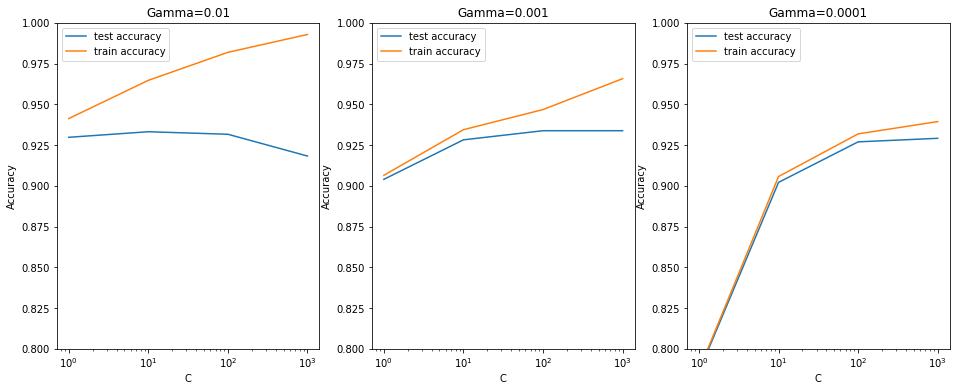

In [11]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [12]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9338509316770185 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


#### Building and Evaluating the Final Model

In [13]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[810  39]
 [ 60 472]] 

accuracy 0.9283128167994207
precision 0.923679060665362
sensitivity/recall 0.8872180451127819
